# Treecor test

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import treecorr

In [2]:
from perfiles import lenscat_load

In [3]:
def make_randoms_box(x, y, z, size_random, col_names=['x','y','z']):
    '''
    N = int(size_random**(1./3.))+1
    x_rand = np.random.uniform(min(x), max(x), N)
    y_rand = np.random.uniform(min(y), max(y), N)
    z_rand = np.random.uniform(min(z), max(z), N)
    '''
    xv, yv, zv = np.random.randint(x.min(), x.max(), size=(3,size_random))
    
    randoms = {col_names[0]: xv, col_names[1]: yv, col_names[2]:zv}

    return randoms

In [4]:
args = (10.0, 11.0, 0.2, 0.4, -1.0, -0.8, -1.0, 100.0)
L, _, nvoids = lenscat_load(*args, lensname='../../../FAMAF/Lensing/cats/MICE/voids_MICE.dat')

In [5]:
mparticle = 2.93e10 # Msun/h
with fits.open('../../../FAMAF/Lensing/cats/MICE/mice_halos_cut.fits') as f:
    lmhalo = f[1].data.lmhalo
    mask_particles = (lmhalo > np.log10(5*mparticle))
    xhalo = f[1].data.xhalo[mask_particles]
    yhalo = f[1].data.yhalo[mask_particles]
    zhalo = f[1].data.zhalo[mask_particles]
    lmhalo = lmhalo[mask_particles]

In [6]:
void_cat = treecorr.Catalog(x=L[5], y=L[6], z=L[7])
halo_cat = treecorr.Catalog(x=xhalo, y=yhalo, z=zhalo)
rand_cat = treecorr.Catalog(x=make_randoms_box(xhalo, yhalo, zhalo, int(1e6))['x'],
                            y=make_randoms_box(xhalo, yhalo, zhalo, int(1e6))['y'],
                            z=make_randoms_box(xhalo, yhalo, zhalo, int(1e6))['z'],
                           )

In [7]:
dd = treecorr.NNCorrelation(nbins=30,min_sep=0.1,max_sep=50)
dr = treecorr.NNCorrelation(nbins=30,min_sep=0.1,max_sep=50)
rd = treecorr.NNCorrelation(nbins=30,min_sep=0.1,max_sep=50)
rr = treecorr.NNCorrelation(nbins=30,min_sep=0.1,max_sep=50)
dd.process(halo_cat,void_cat)
dr.process(halo_cat,rand_cat)
rd.process(rand_cat,halo_cat)
rr.process(rand_cat,rand_cat)

In [8]:
r = np.copy(dd.rnom)
mean_r = np.copy(dd.meanr)
mean_logr = np.copy(dd.meanlogr)

In [9]:
xi, varxi = dd.calculateXi(rr=rr, dr=dr, rd=rd)

[]

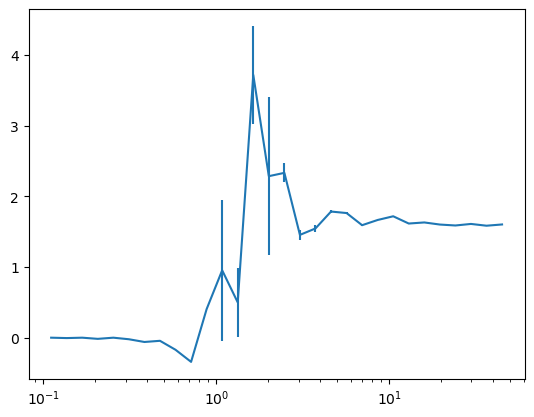

In [10]:
plt.errorbar(r, xi, varxi)
plt.semilogx()